## Next BEST Game



In [415]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [417]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')

In [418]:
df.shape

(16598, 10)

In [419]:
df.dtypes #어떤 데이터 타입이 있는지 

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

## EDA

#### 숫자 단위 K (천), M (백만) 모두 Million 단위로 전환

In [420]:
df.NA_Sales= (df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
          df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
                     .fillna(1)
                     .replace(['K','M'], [10**6, 10**6]).astype(int))

In [421]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [422]:
df.EU_Sales= (df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
          df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
                     .fillna(1)
                     .replace(['K','M'], [10**6, 10**6]).astype(int))

In [423]:
df.JP_Sales= (df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
          df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
                     .fillna(1)
                     .replace(['K','M'], [10**6, 10**6]).astype(int))

In [424]:
df.Other_Sales= (df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
          df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
                     .fillna(1)
                     .replace(['K','M'], [10**6, 10**6]).astype(int))

In [425]:
df = df.drop('Unnamed: 0', axis=1) #unnamed 컬럼 삭제
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#### 결측치 없애기

In [426]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [427]:
df = df[df["Year"].notnull()]
df = df[df["Genre"].notnull()]
df = df[df["Publisher"].notnull()]

In [428]:
df.astype({'NA_Sales':'float','EU_Sales':'float','JP_Sales':'float','Other_Sales':'float'}).dtypes #데이터 타입 전환

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

#### YEAR 데이터 1980년부터 2020년까지 추출 
유의미한 데이터들이 게임산업이 발전하기 시작한 1980년대 이후부터 있을 것이라는 판단에서 그 이전 데이터는 삭제함. 

In [429]:
df2 = df[(df['Year'] >= 1980) & (df['Year'] < 2020)] #1980년에서 2020년 사이에 있는 년도 데이터만 저장. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



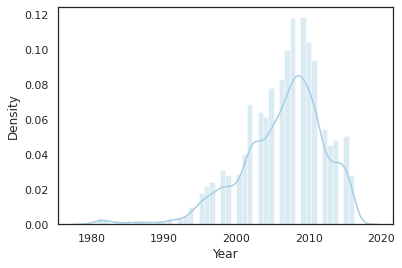

In [430]:
sns.distplot(df2['Year'])

In [431]:
df2['All_Sales'] = df2['NA_Sales'] + df2['EU_Sales'] + df2['JP_Sales'] + df2['Other_Sales']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 게임 시장 현황

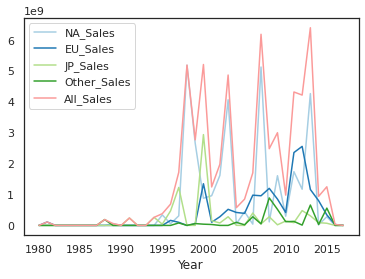

In [432]:
sales_df = df2[[x for x in df2.columns if 'Sales' in x]+['Year']]
sales_df.groupby('Year').sum().plot()

게임 시장 현황을 보면, 1990년대 초반을 기점으로 2000년 전까지는 매출액이 지속적으로 상승하는 것을 볼 수 있습니다. 하지만 2005년과 2010년 큰 기복을 나타내며 하락세를 나타내고, 2010년에서 2015년 사이에는 최고점을 기록합니다. 하지만 2015년 이후에는 계속 하락하는 것을 알 수 있습니다. 

## 지역에 따라서 선호하는 게임 장르가 다를까?

#### 조사 대상 국가 전체에서 가장 많이 판매된 게임 장르는 플랫폼이다. 

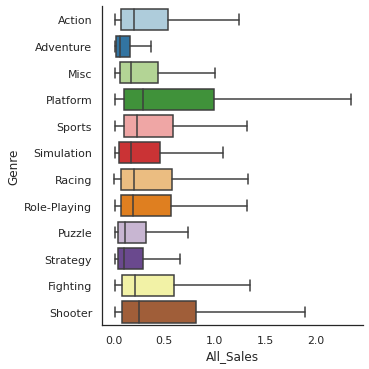

In [433]:
sns.catplot(y="Genre", x="All_Sales", data=df2,
            kind="box", showfliers=False) 

#### EU에서 가장 많이 판매 된 게임 장르는 슈터다.



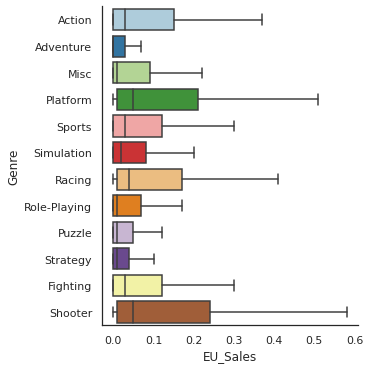

In [434]:
sns.catplot(y="Genre", x="EU_Sales", data=df2,
            kind="box", showfliers=False)

#### North America 에서 가장 많이 판매된 게임 장르는 플랫폼이다.

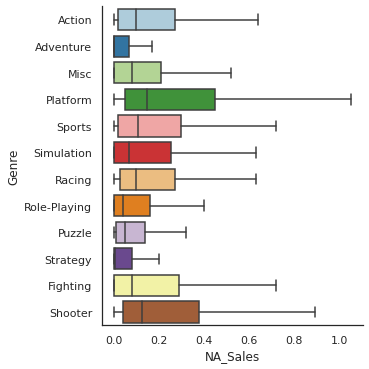

In [435]:
sns.catplot(y="Genre", x="NA_Sales", data=df2,
            kind="box", showfliers=False) 

#### 일본에서 가장 많이 판매된 게임 장르는 롤 플레잉 게임이다.

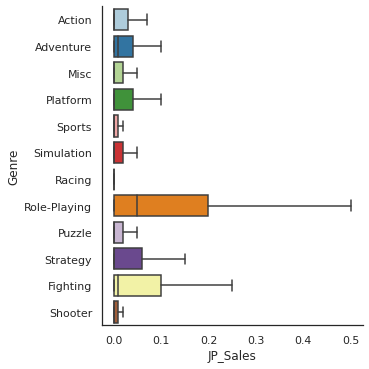

In [436]:
sns.catplot(y="Genre", x="JP_Sales", data=df2,
            kind="box", showfliers=False) 

#### 다른 나라들에서 가장 많이 판매된 게임은 장르는 슈터다. 

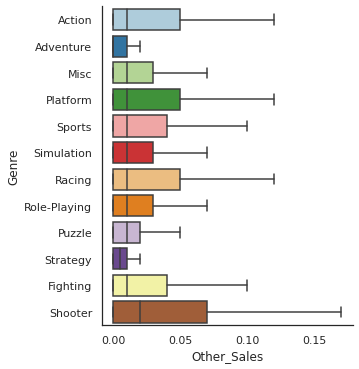

In [437]:
sns.catplot(y="Genre", x="Other_Sales", data=df2,
            kind="box", showfliers=False)

##연도별 게임 트렌드가 있을까?

#### 연도별 가장 많이 팔린 게임  글로벌 매출액 


In [442]:
year_sales=df2.iloc[:, [0,2,9]].groupby(['Year']).All_Sales.max().reset_index()
year_game=df2[['Name','All_Sales','Year']]
bestg_of_year=pd.merge(year_sales, year_game, on=['Year','All_Sales'],how='left')

trace = go.Bar(x=bestg_of_year.Year,
               y=bestg_of_year.All_Sales,
               marker=dict(color=bestg_of_year.All_Sales,colorscale='blues'),
               name='Best Game of the Year',
               text = bestg_of_year['Name'],
               hovertemplate = '<i>Year: %{x}</i>'
                               '<br><i>Game: %{text}</i>'
                               '<br><i>All Sales: %{y}</i>')

layout = go.Layout(
    title='Best Selling Game of the Year',
    xaxis=dict(tickmode = 'linear',tickfont=dict(size=11),
        title='Year',tickwidth=6,ticklen=8,zeroline=False,
    tickangle=-90),
    yaxis=dict(
        title='All Sales'),
    bargap=0.2,
    bargroupgap=0.1, 
    plot_bgcolor="white")
fig = go.Figure(data=[trace], layout=layout)
fig

게임 유통사별 가장 유명한 게임들 리스트

- Electornic Arts(1982년 창립): FIFA, Battlefield

- Activision(1979년 창립): Call of Duty, Sekiro, Destiny, 둠

- Namco Bandai Games(2006년 게임 부문 통합): Dragon Ball

- Ubisoft(1986년): 레이맨, 톰 클랜시, 에쌔신 크리드

- Konami Digital Entertainment(1969년): 남극탐험, 프로야구 

- THQ(1990년 창립 - 2013년 해제): 컴퍼니 오브 히어로즈, 워해머

- Nintendo(1970년대 비디오게임 회사로 확장): 슈퍼마리오, 포켓몬, 동물의 숲 

- Sony Computer Entertainment(1993): 파이널 판타지, 갓오브워


### 년도별 출시 상황

2009년 가장 많은 게임이 출시됐고, 2000년대 강세를 보이지만 2017년에 가장 적게 게임이 출시 됐다는 결과가 나왔다. 

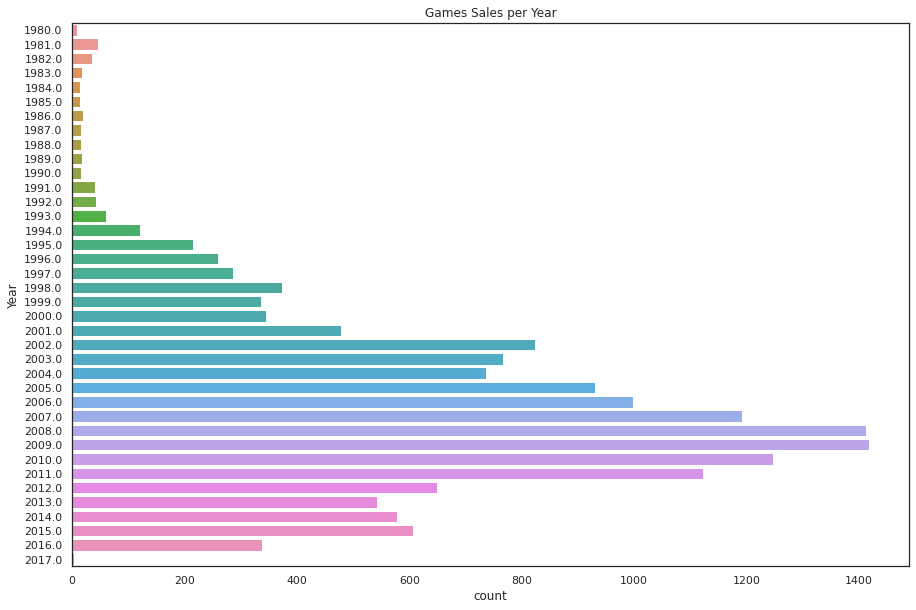

In [443]:
df2['Year'].value_counts().sort_values(ascending=False)
plt.figure(figsize = (15,10))
plt.title('Games Sales per Year')
sns.countplot(y='Year', data=df2)
plt.show()

가장 많이 출시된 플렛폼 게임은 DS, PS2인 것으로 나타났다. 

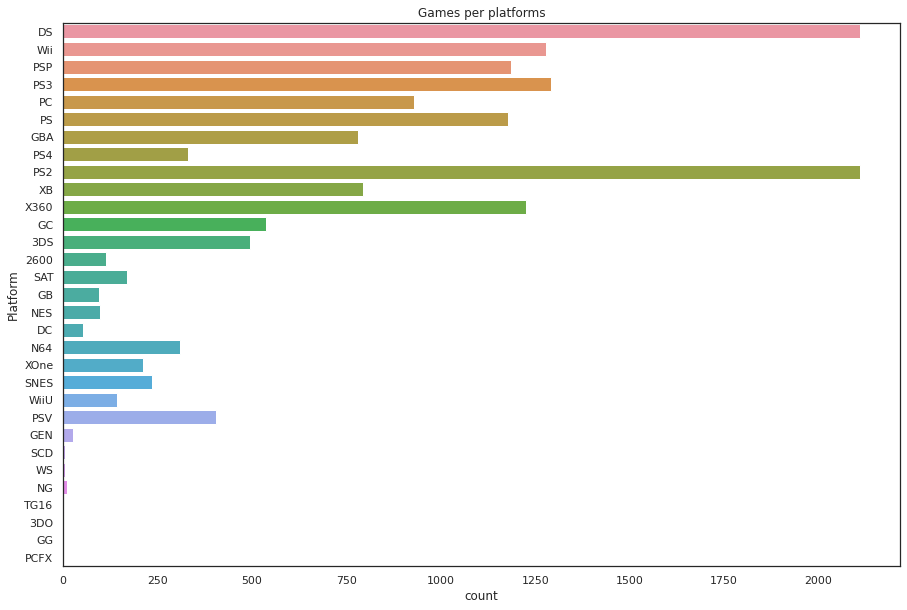

In [444]:
plt.figure(figsize = (15,10))
plt.title('Games per platforms')
sns.countplot(y='Platform', data=df2)
plt.show()

전체 판매량을 보면 The Legend of Zelda: Ocarina of Time 판매량이 가장 높음. 닌텐도 게임(N64), 휴대용 게임기 GBA 판매량이 높았음. 

In [446]:
sales_All_sorted_df = df2.sort_values(by = ['All_Sales'], ascending = False)
sales_All_sorted_df.head()[['Name', 'All_Sales', 'Publisher', 'Platform']]

,Name,All_Sales,Publisher,Platform
1964,The Legend of Zelda: Ocarina of Time,4.100000e+09,Nintendo,N64
9829,Super Mario Bros. 3,2.930000e+09,Nintendo,GBA
3589,Final Fantasy IX,2.780000e+09,SquareSoft,PS
13935,Crash Team Racing,2.570000e+09,Sony Computer Entertainment,PS
1629,Assassin's Creed III,2.560000e+09,Ubisoft,PS3


NA 지역에선 The Legend of Zelda의 판매량이 가장 높게 나왔음.


In [447]:
sales_NA_sorted_df = df2.sort_values(by = ['NA_Sales'], ascending = False)
sales_NA_sorted_df.head()[['Name', 'NA_Sales', 'Publisher', 'Platform']]

,Name,NA_Sales,Publisher,Platform
1964,The Legend of Zelda: Ocarina of Time,4.100000e+09,Nintendo,N64
9829,Super Mario Bros. 3,2.930000e+09,Nintendo,GBA
13935,Crash Team Racing,2.570000e+09,Sony Computer Entertainment,PS
11996,Guitar Hero II,2.010000e+09,Activision,X360
9791,Call of Duty: Ghosts,1.780000e+09,Activision,PS4


EU 지역에선 어세신스 크리드의 판매량이 가장 높게 나왔음.

In [448]:
sales_NA_sorted_df = df2.sort_values(by = ['EU_Sales'], ascending = False)
sales_NA_sorted_df.head()[['Name', 'EU_Sales', 'Publisher', 'Platform']]

,Name,EU_Sales,Publisher,Platform
1629,Assassin's Creed III,2.560000e+09,Ubisoft,PS3
8010,Battlefield 3,2.130000e+09,Electronic Arts,X360
5024,WWF SmackDown!,1.350000e+09,THQ,PS
14318,Viva Pinata,9.600000e+08,Microsoft Game Studios,X360
972,Smarty Pants,7.600000e+08,Electronic Arts,Wii


JP 지역에선 파이널 판타지의 판매량이 가장 높게 나왔음.

In [449]:
sales_JP_sorted_df = df2.sort_values(by = ['JP_Sales'], ascending = False)
sales_JP_sorted_df.head()[['Name', 'JP_Sales', 'Publisher', 'Platform']]

,Name,JP_Sales,Publisher,Platform
3589,Final Fantasy IX,2.780000e+09,SquareSoft,PS
9464,Densha De Go!,1.020000e+09,Taito,PS
6167,Resident Evil Director's Cut,4.700000e+08,Virgin Interactive,PS
6342,Kirby's Dream Collection: Special Edition,3.300000e+08,Nintendo,Wii
9995,Virtua Racing,2.600000e+08,Sega,GEN


Other 지역에선 The Witcher 3: Wild Hunt의 판매량이 가장 높게 나왔음.

In [450]:
Other_sorted_df = df2.sort_values(by = ['Other_Sales'], ascending = False)
Other_sorted_df.head()[['Name', 'Other_Sales', 'Publisher', 'Platform']]

,Name,Other_Sales,Publisher,Platform
15567,The Witcher 3: Wild Hunt,560000000.0,Namco Bandai Games,PS4
5374,Resident Evil 5,340000000.0,Capcom,X360
14129,Need for Speed Rivals,310000000.0,Electronic Arts,PS3
15720,Madden NFL 09,270000000.0,Electronic Arts,PS2
7703,Saints Row 2,270000000.0,THQ,X360


In [451]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.graph_objects as go

In [452]:
pub_sales=df2.groupby(['Year','Publisher']).All_Sales.sum().reset_index()
pub_years=pub_sales.groupby('Year').All_Sales.max().reset_index()
bestp_of_year=pd.merge(pub_years,pub_sales,on=['Year','All_Sales'],how='left')

trace = go.Bar(x=pub_years.Year,
               y=pub_years.All_Sales,
               marker=dict(color=pub_years.All_Sales, colorscale='tropic'),
               opacity=0.80,
               name='Bestselling Publisher of the Year',
               text = Pub_of_Yr['Publisher'],
               hovertemplate = '<i>Year: %{x}</i>'
                               '<br><i>Publisher: %{text}</i>'
                               '<br><i>All Sales: %{y}</i>')
layout = go.Layout(
    title='Bestselling Publiser of the Year',
    xaxis=dict(tickmode = 'linear',tickfont=dict(size=11),
        title='Year',tickwidth=5,ticklen=8,zeroline=False,
    tickangle=-90),
    yaxis=dict(tick0=0,
        dtick=25,
        title='All Sales'),
    bargap=0.2,
    bargroupgap=0.1, 
    plot_bgcolor="white")
fig = go.Figure(data=[trace], layout=layout)
fig

#### 닌텐도사의 N64게임 젤다의 전설의 판매랑이 북미 지역에서 가장 높았고, 유럽연합에선 유비소프트사의 PS3 게임 어세신스 크리드가 가장 높은 판매량을 기록했다. 일본에선 스퀘어소프트사의 파이널판타지가, 기타 지역에선 남코반다의 더 위처3 PS4 게임이 가장 높은 판매량을 나타냈다.

##10년 주기로 게임 비교

In [453]:
df19=df2[df2['Year']<=2000]
df20=df2[(df2['Year']>2000) & (df2['Year']<=2010)]
df21=df2[df2['Year']>2010]

In [454]:
index = ['NA', 'EU', 'JP', 'Other Country', 'All']
 
newdf=pd.DataFrame({'1990':[df19['NA_Sales'].sum(), # 2000년대 이전의 게임들
                                      df19['EU_Sales'].sum(),
                                      df19['JP_Sales'].sum(),
                                      df19['Other_Sales'].sum(),
                                      df19['All_Sales'].sum()],
                      '2010':[df20['NA_Sales'].sum(), #2001년부터 2010년 사이의 게임
                                      df20['EU_Sales'].sum(),
                                      df20['JP_Sales'].sum(),
                              df20['Other_Sales'].sum(),
                              df20['All_Sales'].sum()],
                    '2020':[df21['NA_Sales'].sum(), #2011년 이후의 게임
                                      df21['EU_Sales'].sum(),
                                      df21['JP_Sales'].sum(),
                                      df21['Other_Sales'].sum(),
                                      df21['All_Sales'].sum()]},index=index)

newdf

,1990,2010,2020
NA,9.496461e+09,1.434092e+10,7.484621e+09
EU,1.773690e+09,6.129841e+09,7.255661e+09
JP,5.186941e+09,1.404991e+09,1.040410e+09
Other Country,3.704101e+08,2.012261e+09,1.390990e+09
All,1.682750e+10,2.388801e+10,1.717168e+10


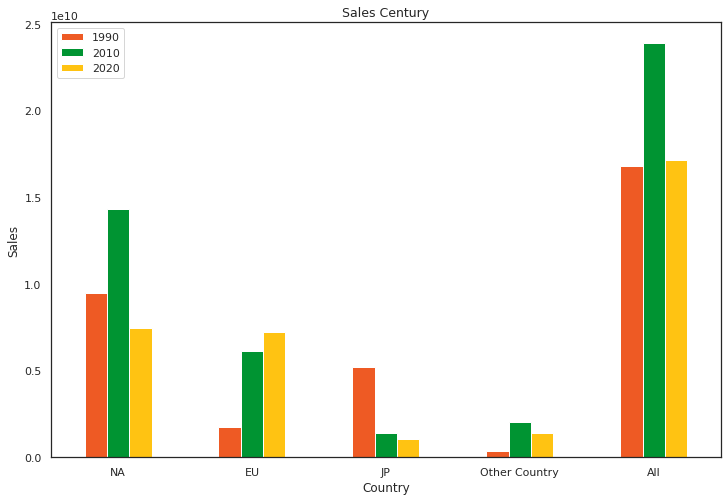

In [455]:
sns.set_style("white")

newdf.plot(kind='bar',figsize=(12,8),color=['#EE5A24','#009432', '#FFC312'])
plt.xticks(rotation=0)
plt.title('Sales Century',fontdict={'fontsize':12.5})
plt.xlabel('Country',fontdict={'fontsize':12})
plt.ylabel('Sales',fontdict={'fontsize':12});
plt.show()

####최근 10년간 가장 인기있는 장르

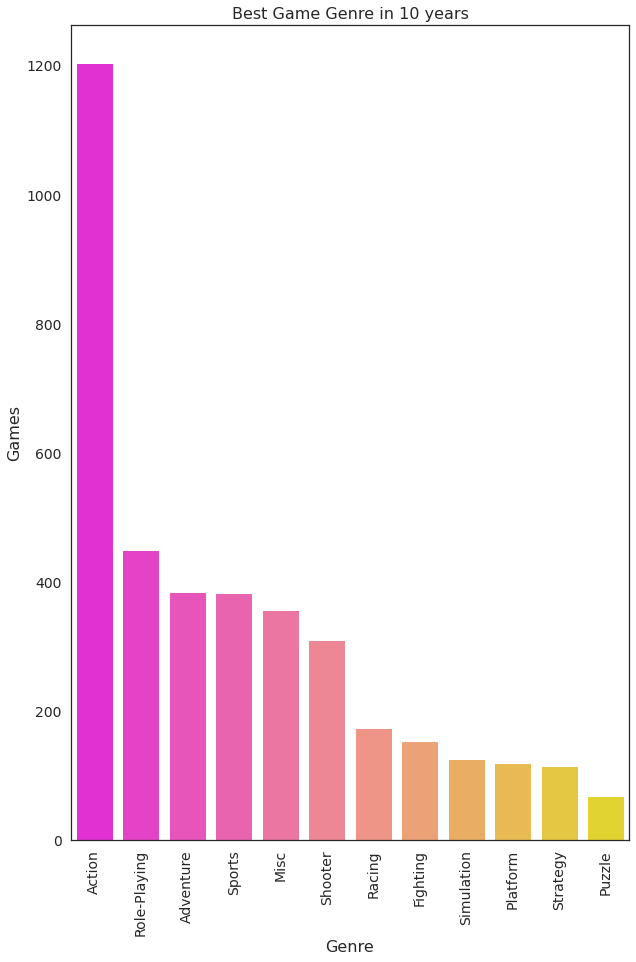

In [463]:
fig=plt.figure(figsize=(10,15))
plt.subplots_adjust(left=None, wspace=0.20, hspace=0.95)
sns.set_style("white")

plt.title('Best Game Genre in 10 years',fontdict={'fontsize':16})
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90)
sns.barplot(x=df21.Genre.value_counts().index, y=df21.Genre.value_counts(),palette='spring');
plt.xlabel('Genre',fontdict={'fontsize':16})
plt.ylabel('Games',fontdict={'fontsize':16});

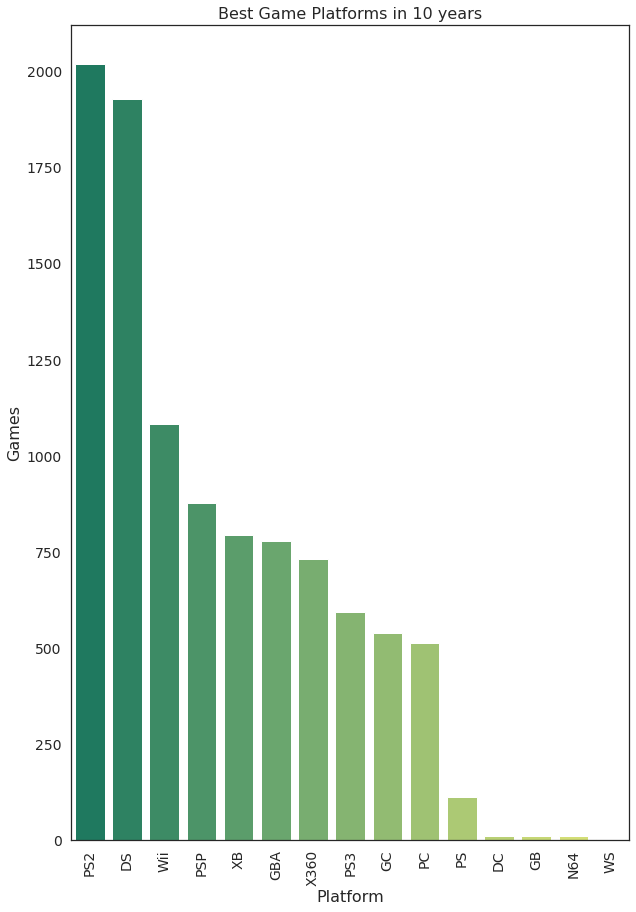

In [457]:
fig=plt.figure(figsize=(10,15))
plt.subplots_adjust(left=None, wspace=0.20, hspace=0.30)
sns.set_style("white")

sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Best Game Platforms in 10 years',fontdict={'fontsize':16})
plt.xticks(rotation=90)
sns.barplot(x=df20.Platform.value_counts().index, y=df20.Platform.value_counts(),palette='summer');
plt.xlabel('Platform',fontdict={'fontsize':16})
plt.ylabel('Games',fontdict={'fontsize':16});

#### 생각해 볼 부분

## 지역별 판매랑 추이

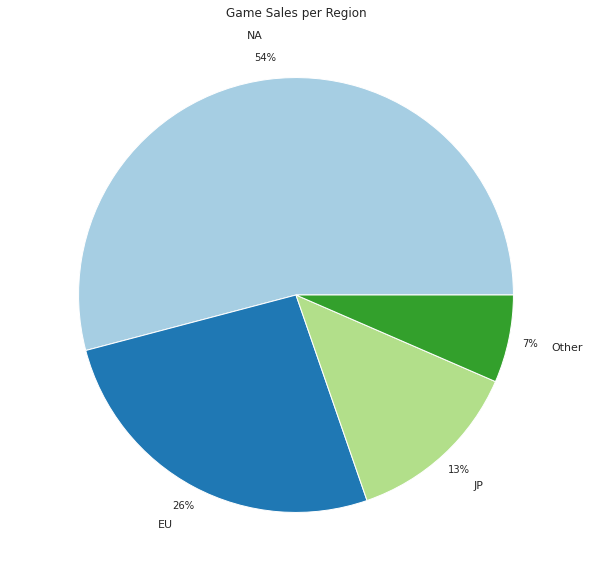

In [445]:
Total_Sales = df2.All_Sales.sum()
NA_Sales_percent = (df2.NA_Sales.sum()*100)/Total_Video_Games_Sales
EU_Sales_percent = (df2.EU_Sales.sum()*100)/Total_Video_Games_Sales
JP_Sales_percent = (df2.JP_Sales.sum()*100)/Total_Video_Games_Sales
Other_Sales_percent = (df2.Other_Sales.sum()*100)/Total_Video_Games_Sales

plt.figure(figsize=(15,10))
plt.pie([NA_Sales_percent, EU_Sales_percent, JP_Sales_percent, Other_Sales_percent], labels=['NA', 'EU', 'JP', 'Other'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Game Sales per Region')
plt.ylabel(' ')
plt.show()

In [458]:
df2.groupby('NA_Sales').size() #484

NA_Sales
0.000000e+00    4388
1.000000e-02     507
2.000000e-02     521
3.000000e-02     516
4.000000e-02     510
                ... 
1.780000e+09       1
2.010000e+09       1
2.570000e+09       1
2.930000e+09       1
4.100000e+09       1
Length: 484, dtype: int64

In [459]:
df2.groupby('EU_Sales').size() #356

EU_Sales
0.000000e+00    5564
1.000000e-02    1434
2.000000e-02    1225
3.000000e-02     897
4.000000e-02     716
                ... 
7.600000e+08       1
9.600000e+08       1
1.350000e+09       1
2.130000e+09       1
2.560000e+09       1
Length: 356, dtype: int64

In [460]:
df2.groupby('JP_Sales').size() #276

JP_Sales
0.000000e+00    10113
1.000000e-02      680
2.000000e-02      699
3.000000e-02      514
4.000000e-02      386
                ...  
2.600000e+08        1
3.300000e+08        1
4.700000e+08        1
1.020000e+09        1
2.780000e+09        1
Length: 276, dtype: int64

In [461]:
df2.groupby('Other_Sales').size() #186

Other_Sales
0.000000e+00    6272
1.000000e-02    3315
2.000000e-02    1532
3.000000e-02     898
4.000000e-02     647
                ... 
2.300000e+08       1
2.700000e+08       2
3.100000e+08       1
3.400000e+08       1
5.600000e+08       1
Length: 186, dtype: int64